Ref : https://www.zinkov.com/posts/2015-06-09-where-priors-come-from/

Keep in mind, there are multiple effective priors for a particular problem. The best prior to use for a problem is not some wisdom set in stone. A particular prior is chosen as some combination of analytic tractability, computationally efficiency, and does it make other recognizable distributions when combined with popular likelihood functions. Better priors are always being discovered by researchers.

In [121]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [282]:
plt.style.use('bmh')
def display_histogram(dist, samples=10000, **kwargs):
    plt.hist(dist(samples), **kwargs,bins=50)

## Uniform Distribution

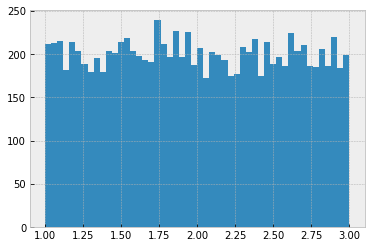

In [283]:
def uniform(lo, hi):
    return lambda samples: r.uniform(lo, hi, samples) #any value within the given interval is equally likely to be drawn by uniform.

display_histogram(uniform(1, 3))

## Normal Distribution

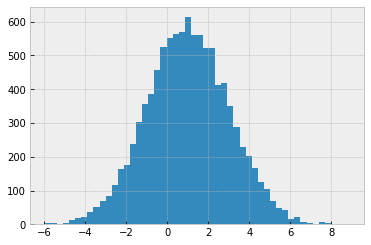

In [284]:
def normal(mu, sd):
    return lambda s: r.normal(mu, sd, s)  # mu-mean ; sd-sandard deviation 

display_histogram(normal(1, 2))

## Central Limit Theorem

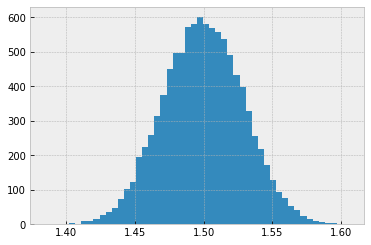

In [285]:
def clt(samples):
    return np.array([np.mean(r.uniform(1, 2, 100))
                     for i in range(samples)]) # mean for 100 samples drawn from uniform distribution betn [1,2) * repeated 10k time
display_histogram(clt)

## Bernoulli distribution

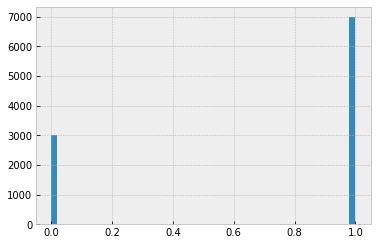

In [286]:
def bern(p):
    def samples(s):
        u = r.uniform(0, 1, s)
        return np.where(u < p, 1, 0) # if u is smaller than p then 1 else 0
    return samples

display_histogram(bern(0.7))

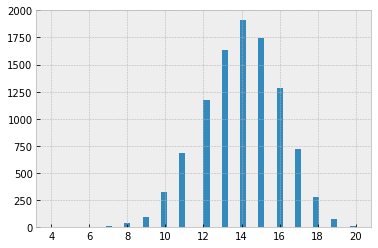

In [287]:
def binomial(n, p):
    def samples(s):
        k = [np.sum(bern(p)(n)) for s in range(s)] # array of length s with each entry representing no. of 1's occured                                   
        return np.array(k)                         # in n coin flips, where prob of 1 occuring is p for each flip
    return samples

display_histogram(binomial(20, 0.7))

In [288]:
bern(0.5)(10)

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

Coin is flipped 20 times for 10000 times.  
From hist,  
(if heads = true/1)  
Out of 20, the coin landed heads 14 times for ~ 3500 times  

## Categorical distribution
Categorical is the distribution when you have a variable that can take on a discrete set of values. Its arguments are the probability you believe for each value of appearing. 

In [289]:
def categorical(ps):
    def samples(s):
        return r.choice(a=range(len(ps)), size=s, p=ps) # will return s values, where each value is choosen randomly from 
                                                # a (here [0,1,2]) with p being probabilities associated with each entry in a
    return samples

In [290]:
categorical([0.2, 0.5, 0.3])(10)

array([0, 2, 2, 2, 0, 2, 1, 1, 2, 2])

In [291]:
def onehot(n, k):
    return np.eye(1, n, k=k)[0] 


def categorical2(ps):
    def samples(s):
        l = len(ps)
        return np.array([onehot(l,r.choice(range(l),  p=ps)) for i in range(s)])
    return samples


In [292]:
np.eye(1, 5, k=-1)

array([[0., 0., 0., 0., 0.]])

In [293]:
categorical2([0.2, 0.5, 0.3])(5)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Gamma distribution

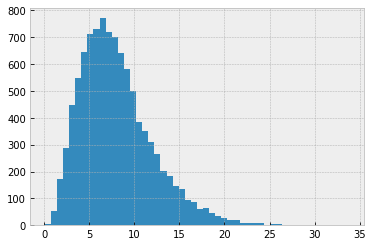

In [294]:
def gamma(shape, scale):
    return lambda s: r.gamma(shape, scale, s)

display_histogram(gamma(4,2), 10000)  # gamma(k,theta) k : shape, theta : scale

## Beta Distribution

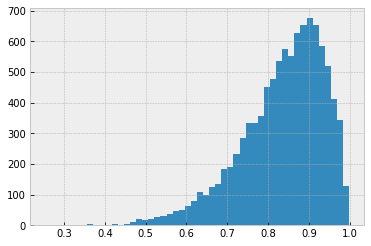

In [295]:
def beta(a, b):
    def samples(s):
        x = r.gamma(a, 1, s)
        y = r.gamma(b, 1, s)
        return x/(x + y) #normalizing
    return samples

display_histogram(beta(10,2), 10000)

## Poisson Distribution

In [296]:
def overdispersed_poisson(shape,scale):
    def samples(s):
        lam = r.gamma(shape, scale, s)
        return r.poisson(lam)
    return samples

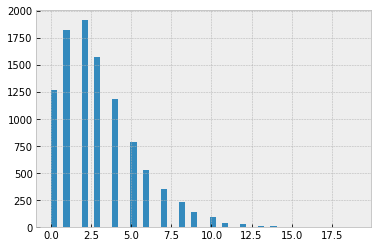

In [301]:
display_histogram(overdispersed_poisson(3,1), 10000)
# display_histogram(overdispersed_poisson(3,3), 10000)
# display_histogram(overdispersed_poisson(3,5), 10000)
# display_histogram(overdispersed_poisson(3,7), 10000)

## Weibull distribution

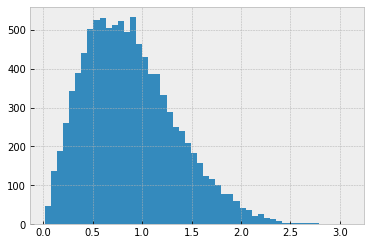

In [302]:
def weibull(lam, k):
    def samples(s):
        return lam*r.weibull(k, s)
    return samples


display_histogram(weibull(1, 2), 10000)

## Laplace distribution

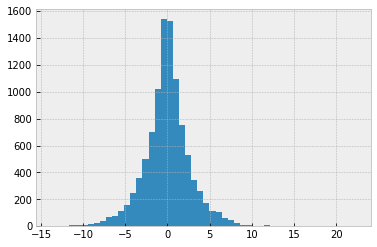

In [307]:
def laplace(loc, scale):
    def samples(s):
        return r.laplace(loc, scale, s)
    return samples

display_histogram(laplace(0,2), 10000)

In [305]:
def display_histogram2d(dist, samples=1000, **kwargs):
    x, y = dist(samples)
    plt.hist2d(x, y,
               bins=100,
               normed=False,
               cmap="BuPu",
               **kwargs)


def multinorm(mean, cov):
    def samples(s):
        return r.multivariate_normal(mean, cov, s).T
    return samples

C:\Users\Atharva\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  import sys


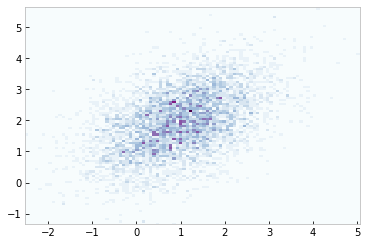

In [51]:
cov = [[1.0, 0.5],
       [0.5, 1.0]]

display_histogram2d(multinorm([1,2], cov), 5000)

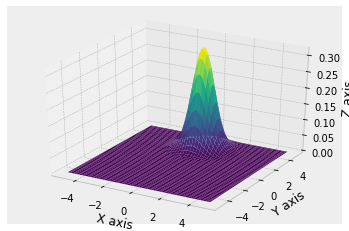

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 0.5

mu_y = 3
variance_y = 0.5

#Create grid and multivariate normal
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

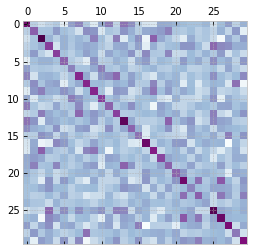

In [65]:
def wishart(v, n):
    va = np.asarray(v)
    def one_sample():
        X = np.matrix(multinorm(np.zeros(va.shape[0]), va)(n).T)
        return X.T*X

    def samples(s):
        return np.array([one_sample() for i in range(s)])
    return samples

m = wishart(np.eye(30), 10)(1)[0]
plt.matshow(m, cmap="BuPu")

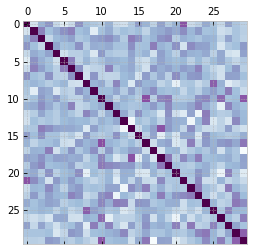

In [66]:
def vine(eta, d):
    def one_sample():
        b = eta + (d - 1)/2
        P = np.zeros((d, d))
        S = np.eye(d)

        for k in range(d-1):
            b = b - 0.5
            for i in range(k+1, d):
                P[k, i] = 2*r.beta(b, b) - 1
                p = P[k, i]
                for l in range(k-1, 0, -1):
                    p = p * np.sqrt((1-P[l, i]**2) *
                                    (1-P[1, k]**2)) + P[l, i]*P[l, k]
                S[k, i] = p
                S[i, k] = p
        return S

    def samples(s):
        return np.array([one_sample() for i in range(s)])
    return samples

m = vine(2.0, 30)(1)[0]
plt.matshow(m, cmap="BuPu")

In [69]:
def multinomial(n, ps):
    def samples(s):
        m = [np.sum(categorical2(ps)(n), axis=0) for s in range(s)]
        return np.array(m)
    return samples


In [104]:
sample=multinomial(10, [0.2, 0.3, 0.1,0.2,0.2])(5)
sample

array([[2., 4., 0., 1., 3.],
       [2., 5., 1., 2., 0.],
       [2., 4., 2., 1., 1.],
       [4., 1., 0., 2., 3.],
       [3., 3., 1., 0., 3.]])